# 오차 제곱합

In [1]:
import numpy as np

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [3]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [4]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

# 교차 엔트로피

In [6]:
def cross_entropy(Y, P):
    Y = np.array(Y)
    P = np.array(P)
    
    return -np.sum(Y*np.log(P) + (1 - Y)*np.log(1 - P)).round(1)

In [7]:
P = [[0.6, 0.2, 0.9, 0.3], [0.7, 0.9, 0.2, 0.4]]
Y = [[1., 1., 0., 0.], [1., 1., 0., 0.]]

for p, y in zip(P, Y):
    print(cross_entropy(y, p))

4.8
1.2


In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

In [9]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [10]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

# 미니 배치

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    delta = 1e-7
    
    return -np.sum(t*np.log(y+delta))/batch_size

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

라벨 인코딩인 경우 미니배치

In [78]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    delta = 1e-7
    
    return -np.sum(np.log(y[np.arange(batch_size), t]+delta))/batch_size

In [33]:
cross_entropy_error(np.array(y), np.array(t))

23.718987110506905

# 미분

In [34]:
def numerical_diff(f, x):
    h = 1e-7
    return (f(x+h) - f(x))/h

In [40]:
def numerical_diff(f, x):
    h = 1e-7
    return (f(x+h) - f(x-h))/(2*h)

In [41]:
def function_1(x):
    return 0.01*x**2 + 0.1*x 
# y = 0.01x^2 + 0.1x

In [42]:
numerical_diff(function_1, 5)

0.19999999989472883

In [44]:
import matplotlib.pylab as plt

In [43]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

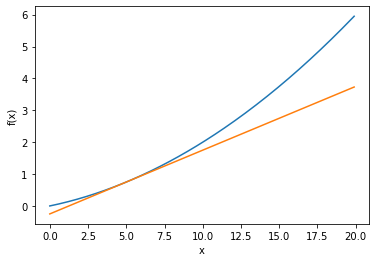

In [50]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x,y)
plt.plot(x,y2)
plt.show()

# Gradient Descent

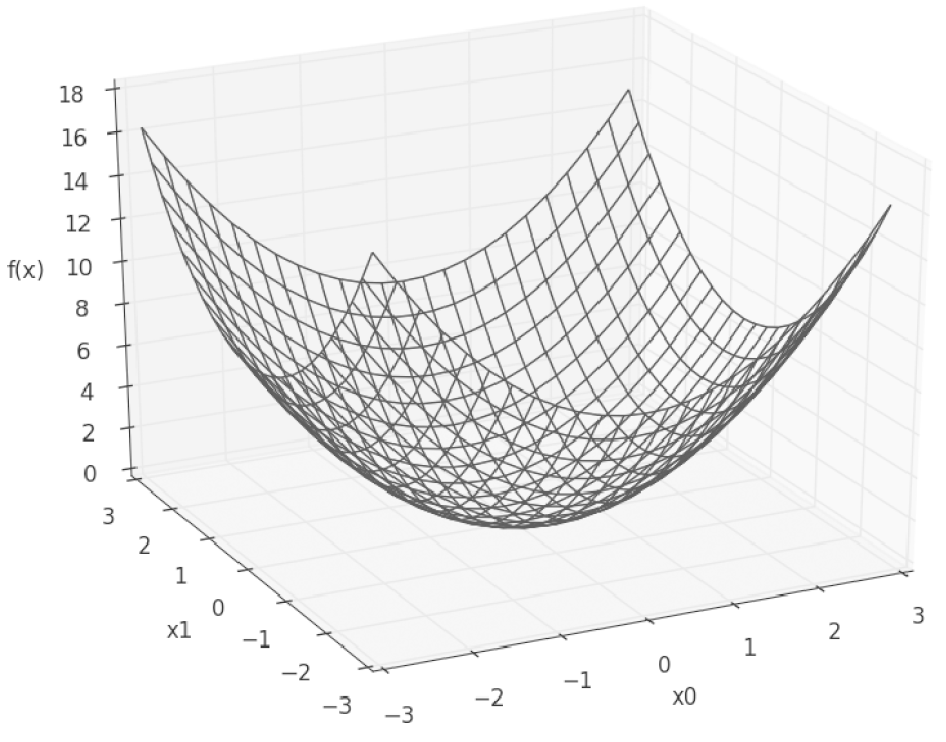

In [51]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [52]:
def numerical_gradient(f, x):
    h = 1e-7
    
    # x의 차원수를 그대로 가져와서 0행렬 만듦
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = float(tmp_val) - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [53]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([5.99999998, 8.        ])

In [55]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy)
        
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x, np.array(x_history)

In [56]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

In [57]:
x

array([-6.11110793e-10,  8.14814392e-10])

In [60]:
# 학습률 크니까 튀어버린 것
init_x = np.array([-3.0, 4.0])  
x, x_history = gradient_descent(function_2, init_x, lr=10, step_num=step_num)
x

array([ 2.25899015e+09, -3.00990351e+09])

In [62]:
# 학습률 작으니 움직이지 못하고 개선 안 된 것
init_x = np.array([-3.0, 4.0])  
x, x_history = gradient_descent(function_2, init_x, lr=1e-10, step_num=100)
x

array([-2.99999994,  3.99999992])

In [86]:
def softmax(x):
    exp_x = np.exp(x)
    if exp_x.ndim == 1:
        exp_x= exp_x.reshape(1, exp_x.size)
    
    sum_exp_x = np.sum(exp_x, axis=1).reshape(-1, 1)
    y = exp_x / sum_exp_x
    
    return y

In [87]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-7
    
    # x의 차원수를 그대로 가져와서 0행렬 만듦
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = float(tmp_val) - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


In [88]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
            
        return grad

In [89]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [101]:
net = simpleNet()
net.W


array([[ 1.79047855,  0.95582608,  0.33753225],
       [-0.35240455,  1.13409096,  0.58918951]])

In [102]:
x = np.array([0.6, 0.9])

In [103]:
p = net.predict(x)
p

array([0.75712303, 1.59417752, 0.73278991])

In [104]:
np.argmax(p)

1

In [105]:
t = np.array([0, 0, 1])
net.loss(x, t)

3.528666430420567

In [106]:
def f(W):
    return net.loss(x, t)
dw = numerical_gradient(f, net.W)
dw

array([[-0.77998007,  0.37005769,  0.40992238],
       [-1.1699701 ,  0.55508653,  0.61488357]])

In [107]:
dw = numerical_gradient(lambda w: net.loss(x, t), net.W)
dw

array([[-0.77998007,  0.37005769,  0.40992238],
       [-1.1699701 ,  0.55508653,  0.61488357]])

In [108]:
net.W -= 0.001 * dw

In [109]:
p = net.predict(x)
p

array([0.75864399, 1.5934559 , 0.73199056])

In [110]:
np.argmax(p)

1

In [111]:
t = np.array([0, 0, 1])
net.loss(x, t)

3.5256994290302144

# 2층 신경망 클래스 구현

In [116]:
import pickle

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1

        return T

    with open('mnist.pkl', 'rb') as f:
        dataset = pickle.load(f)
        
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 

In [113]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    
    delta = 1e-7
    return -np.sum(np.log(y[np.arange(batch_size), t] + delta))/batch_size

In [114]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [118]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(a1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(t == y) / float(x.shape[0])
        
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        

In [119]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=True)

In [120]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [121]:
print(network.params['W1'].shape)
print(network.params['b1'].shape)
print(network.params['W2'].shape)
print(network.params['b2'].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [122]:
x = np.random.rand(50, 784)
y = network.predict(x)

In [123]:
np.argmax(y[0])

5

In [124]:
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

In [ ]:
##### 아래 엄청 오래 걸림 (주의!)

In [133]:
# for i in range(iters_num):
#     # 미니배치 획득
#     batch_mask = np.random.choice(train_size, batch_size)
#     x_batch = x_train[batch_mask]
#     t_batch = t_train[batch_mask]
    
#     grad = network.numerical_gradient(x_batch, t_batch)
    
#     for key in ('W1','b1','W2','b2'):
#         network.params[key] -= learning_rate * grad[key]
        
#     loss = network.loss(x_batch, t_batch)
#     train_loss_list.append(loss)
    
#     train_acc = network.accuracy(x_train, t_train)
#     test_acc = network.accuracy(x_test, t_test)
#     train_acc_list.append(train_acc)
#     test_acc_list.append(test_acc)
    
#     print(f"loss: {loss} train acc, test acc | " + str(train_acc) + ", " + str(test_acc))